In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib as plt
import sklearn as skl
import tensorflow as tf

C:\Users\judyc\Anaconda3\envs\PythonData2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\judyc\Anaconda3\envs\PythonData2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\judyc\Anaconda3\envs\PythonData2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\judyc\Anaconda3\envs\PythonData2\lib\site-pack

In [2]:
# Import our input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
#drop columns that do not have bearing on either target or feature variables
charity2_df = charity_df.drop(columns = ['EIN','NAME'])
charity2_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
#Print our the affiliation value counts
affiliation_counts = charity2_df.AFFILIATION.value_counts()
affiliation_counts


Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

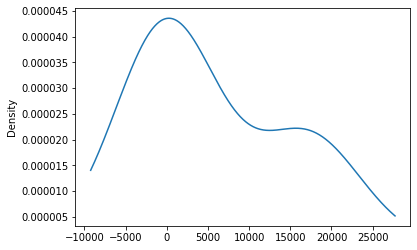

In [6]:
#Visualize the value counts for affiliation
affiliation_counts.plot.density()

In [7]:
# Determine which values to replace
replace_affiliation = list(affiliation_counts[affiliation_counts < 10000].index)

# Replace in DataFrame
for affiliation in replace_affiliation:
    charity2_df.AFFILIATION = charity2_df.AFFILIATION.replace(affiliation,"Other")


# Check to make sure binning was successful
charity2_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [8]:
#Print our the classification value counts
classification_counts = charity2_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C6100        1
C2150        1
C1900        1
C1580        1
C4500        1
Name: CLASSIFICATION, Length: 71, dtype: int64

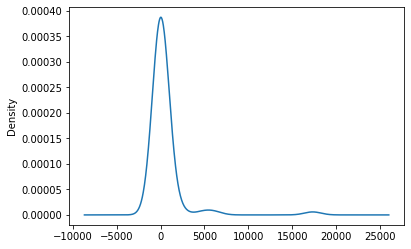

In [9]:
#Visualize the value counts for classification
classification_counts.plot.density()

In [10]:
# Determine which values to replace
replace_classification = list(classification_counts[classification_counts < 5000].index)

# Replace in DataFrame
for classification in replace_classification:
    charity2_df.CLASSIFICATION = charity2_df.CLASSIFICATION.replace(classification,"Other")


# Check to make sure binning was successful
charity2_df.CLASSIFICATION.value_counts()

C1000    17326
Other    10899
C2000     6074
Name: CLASSIFICATION, dtype: int64

In [11]:
#Generate our categorical variable list
charity_cat = charity2_df.dtypes[charity2_df.dtypes == "object"].index.tolist()
charity_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Check the number of unique values in each column
charity2_df[charity_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                3
CLASSIFICATION             3
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity2_df[charity_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
charity2_df = charity2_df.merge(encode_df,left_index=True, right_index=True)
charity2_df = charity2_df.drop(charity_cat,1)
charity2_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
y = charity2_df["IS_SUCCESSFUL"].values
X = charity2_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
charity2_df.dtypes

STATUS                            int64
ASK_AMT                           int64
IS_SUCCESSFUL                     int64
APPLICATION_TYPE_T10            float64
APPLICATION_TYPE_T12            float64
APPLICATION_TYPE_T13            float64
APPLICATION_TYPE_T14            float64
APPLICATION_TYPE_T15            float64
APPLICATION_TYPE_T17            float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T2             float64
APPLICATION_TYPE_T25            float64
APPLICATION_TYPE_T29            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
APPLICATION_TYPE_T7             float64
APPLICATION_TYPE_T8             float64
APPLICATION_TYPE_T9             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Independent         float64
AFFILIATION_Other               float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C2000            float64


# Attempt 1

In [18]:
# Define the model- deep neural net-attempt 1
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn=tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 368       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer = "adam", metrics= ["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs =100)

Epoch 1/100
25724/25724 [==============================] - 1s 37us/sample - loss: 9910.3272 - acc: 0.5010
Epoch 2/100
25724/25724 [==============================] - 1s 38us/sample - loss: 14279.1915 - acc: 0.4986
Epoch 3/100
25724/25724 [==============================] - 1s 35us/sample - loss: 8721.5216 - acc: 0.5122
Epoch 4/100
25724/25724 [==============================] - 1s 29us/sample - loss: 20157.4347 - acc: 0.5012
Epoch 5/100
25724/25724 [==============================] - 1s 33us/sample - loss: 2721.4330 - acc: 0.5196
Epoch 6/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.6996 - acc: 0.5321
Epoch 7/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.6930 - acc: 0.5321
Epoch 8/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.6914 - acc: 0.53210s - loss: 0.6923 - acc: 
Epoch 9/100
25724/25724 [==============================] - 1s 34us/sample - loss: 0.6911 - acc: 0.5321
Epoch 10/100
25724/25724 [=====

25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 79/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 80/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 81/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 82/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 83/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 84/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 85/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 86/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 87/100
25724/25724 [==============================] - 1s 28us/sample - 

In [21]:
# Evaluate the model using the test data-2
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6910 - acc: 0.5332
Loss: 0.6909539709702872, Accuracy: 0.5331778526306152


## Attempt 2- add 2 neurons at layer 1 and change epochs to 62

In [22]:
# Define the model- deep neural net-attempt 2
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn=tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                460       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer = "adam", metrics= ["accuracy"])

In [24]:
# Train the model with less epochs
fit_model = nn.fit(X_train, y_train, epochs = 62)

Epoch 1/62
25724/25724 [==============================] - 1s 34us/sample - loss: 6825.2852 - acc: 0.4981
Epoch 2/62
25724/25724 [==============================] - 1s 28us/sample - loss: 6941.2362 - acc: 0.5056
Epoch 3/62
25724/25724 [==============================] - 1s 28us/sample - loss: 7992.1507 - acc: 0.5260
Epoch 4/62
25724/25724 [==============================] - 1s 28us/sample - loss: 16447.3903 - acc: 0.5064
Epoch 5/62
25724/25724 [==============================] - 1s 29us/sample - loss: 12328.3787 - acc: 0.5209
Epoch 6/62
25724/25724 [==============================] - 1s 29us/sample - loss: 8070.5275 - acc: 0.5419
Epoch 7/62
25724/25724 [==============================] - 1s 29us/sample - loss: 11425.4079 - acc: 0.5223
Epoch 8/62
25724/25724 [==============================] - 1s 28us/sample - loss: 4258.7591 - acc: 0.5105
Epoch 9/62
25724/25724 [==============================] - 1s 28us/sample - loss: 10500.4999 - acc: 0.5419
Epoch 10/62
25724/25724 [==========================

In [25]:
# Evaluate the model using the test data-2
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6911 - acc: 0.5332
Loss: 0.6911351412795376, Accuracy: 0.5331778526306152


# Attempt 3- add 2 nodes at layer 2 and experimented with softmax activation

In [26]:
# Define the model- deep neural net-attempt 3
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 7

nn=tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "softmax"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="softmax"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                460       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 8         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer = "adam", metrics= ["accuracy"])

In [28]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs =100)

Epoch 1/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.6912 - acc: 0.5321
Epoch 2/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.6911 - acc: 0.5321
Epoch 3/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.6912 - acc: 0.5321
Epoch 4/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.6912 - acc: 0.5321
Epoch 5/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.6912 - acc: 0.5321
Epoch 6/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.6911 - acc: 0.5321
Epoch 7/100
25724/25724 [==============================] - 1s 34us/sample - loss: 0.6912 - acc: 0.5321
Epoch 8/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.6912 - acc: 0.5321
Epoch 9/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.6912 - acc: 0.5321
Epoch 10/100
25724/25724 [==============================] - 1s 32us/sampl

25724/25724 [==============================] - 1s 29us/sample - loss: 0.6911 - acc: 0.5321
Epoch 80/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.6911 - acc: 0.5321
Epoch 81/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.6911 - acc: 0.5321
Epoch 82/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.6911 - acc: 0.5321
Epoch 83/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.6911 - acc: 0.5321
Epoch 84/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.6911 - acc: 0.5321
Epoch 85/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.6912 - acc: 0.5321
Epoch 86/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.6911 - acc: 0.5321
Epoch 87/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.6911 - acc: 0.5321
Epoch 88/100
25724/25724 [==============================] - 1s 29us/sample - 

In [29]:
# Evaluate the model using the test data-2
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6910 - acc: 0.5332
Loss: 0.6909760765640103, Accuracy: 0.5331778526306152


# Attempt 4- increase nodes

In [30]:
# Define the model- deep neural net-attempt 3
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 7

nn=tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                460       
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 8         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer = "adam", metrics= ["accuracy"])

In [34]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs =100)

Epoch 1/100
25724/25724 [==============================] - 1s 40us/sample - loss: 21473.2743 - acc: 0.5022
Epoch 2/100
25724/25724 [==============================] - 1s 32us/sample - loss: 4144.0225 - acc: 0.4975
Epoch 3/100
25724/25724 [==============================] - 1s 34us/sample - loss: 13494.1282 - acc: 0.5135
Epoch 4/100
25724/25724 [==============================] - 1s 34us/sample - loss: 12216.9777 - acc: 0.5066
Epoch 5/100
25724/25724 [==============================] - 1s 34us/sample - loss: 2147.1137 - acc: 0.5293
Epoch 6/100
25724/25724 [==============================] - 1s 33us/sample - loss: 4739.8592 - acc: 0.5249
Epoch 7/100
25724/25724 [==============================] - 1s 35us/sample - loss: 9930.1520 - acc: 0.5290
Epoch 8/100
25724/25724 [==============================] - 1s 44us/sample - loss: 11781.6771 - acc: 0.5062
Epoch 9/100
25724/25724 [==============================] - 1s 45us/sample - loss: 4131.8071 - acc: 0.5049
Epoch 10/100
25724/25724 [================

25724/25724 [==============================] - 1s 38us/sample - loss: 0.6911 - acc: 0.5321
Epoch 78/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.6911 - acc: 0.5321
Epoch 79/100
25724/25724 [==============================] - 1s 35us/sample - loss: 0.6911 - acc: 0.5321
Epoch 80/100
25724/25724 [==============================] - ETA: 0s - loss: 0.6912 - acc: 0.531 - 1s 33us/sample - loss: 0.6911 - acc: 0.5321
Epoch 81/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.6911 - acc: 0.5321
Epoch 82/100
25724/25724 [==============================] - 1s 35us/sample - loss: 0.6911 - acc: 0.5321
Epoch 83/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.6911 - acc: 0.5321
Epoch 84/100
25724/25724 [==============================] - 1s 36us/sample - loss: 0.6911 - acc: 0.5321
Epoch 85/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.6911 - acc: 0.5321
Epoch 86/100
25724/25724 [=============

In [35]:
# Evaluate the model using the test data-3
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6910 - acc: 0.5332
Loss: 0.6909813084477239, Accuracy: 0.5331778526306152


## Atttempt 5 change epochs to 300

In [36]:
# Define the model- deep neural net-attempt 5
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 7

nn=tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                460       
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 8         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer = "adam", metrics= ["accuracy"])

In [38]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs =300)

Epoch 1/300
25724/25724 [==============================] - 1s 41us/sample - loss: 0.6913 - acc: 0.5321
Epoch 2/300
25724/25724 [==============================] - 1s 35us/sample - loss: 0.6912 - acc: 0.5321
Epoch 3/300
25724/25724 [==============================] - 1s 35us/sample - loss: 0.6911 - acc: 0.5321
Epoch 4/300
25724/25724 [==============================] - 1s 43us/sample - loss: 0.6913 - acc: 0.5321
Epoch 5/300
25724/25724 [==============================] - 1s 41us/sample - loss: 0.6912 - acc: 0.5321
Epoch 6/300
25724/25724 [==============================] - 1s 38us/sample - loss: 0.6914 - acc: 0.5321
Epoch 7/300
25724/25724 [==============================] - 1s 47us/sample - loss: 0.6912 - acc: 0.5321
Epoch 8/300
25724/25724 [==============================] - 1s 44us/sample - loss: 0.6913 - acc: 0.5321
Epoch 9/300
25724/25724 [==============================] - 1s 48us/sample - loss: 0.6910 - acc: 0.5321
Epoch 10/300
25724/25724 [==============================] - 1s 45us/sampl

25724/25724 [==============================] - 1s 36us/sample - loss: 0.6912 - acc: 0.5321
Epoch 80/300
25724/25724 [==============================] - 1s 36us/sample - loss: 0.6912 - acc: 0.5321
Epoch 81/300
25724/25724 [==============================] - 1s 37us/sample - loss: 0.6912 - acc: 0.5321
Epoch 82/300
25724/25724 [==============================] - 1s 34us/sample - loss: 0.6912 - acc: 0.5321
Epoch 83/300
25724/25724 [==============================] - 1s 36us/sample - loss: 0.6912 - acc: 0.5321
Epoch 84/300
25724/25724 [==============================] - 1s 36us/sample - loss: 0.6912 - acc: 0.5321
Epoch 85/300
25724/25724 [==============================] - 1s 33us/sample - loss: 0.6912 - acc: 0.5321
Epoch 86/300
25724/25724 [==============================] - 1s 35us/sample - loss: 0.6912 - acc: 0.5321
Epoch 87/300
25724/25724 [==============================] - 1s 40us/sample - loss: 0.6912 - acc: 0.5321
Epoch 88/300
25724/25724 [==============================] - 1s 35us/sample - 

25724/25724 [==============================] - 1s 29us/sample - loss: 0.6911 - acc: 0.5321
Epoch 158/300
25724/25724 [==============================] - 1s 30us/sample - loss: 0.6912 - acc: 0.5321
Epoch 159/300
25724/25724 [==============================] - 1s 30us/sample - loss: 0.6911 - acc: 0.5321
Epoch 160/300
25724/25724 [==============================] - 1s 29us/sample - loss: 0.6911 - acc: 0.5321
Epoch 161/300
25724/25724 [==============================] - 1s 30us/sample - loss: 0.6911 - acc: 0.5321
Epoch 162/300
25724/25724 [==============================] - 1s 29us/sample - loss: 0.6911 - acc: 0.5321
Epoch 163/300
25724/25724 [==============================] - 1s 34us/sample - loss: 0.6911 - acc: 0.5321
Epoch 164/300
25724/25724 [==============================] - 1s 30us/sample - loss: 0.6911 - acc: 0.5321
Epoch 165/300
25724/25724 [==============================] - 1s 30us/sample - loss: 0.6911 - acc: 0.5321
Epoch 166/300
25724/25724 [==============================] - 1s 30us/

25724/25724 [==============================] - 1s 30us/sample - loss: 0.6911 - acc: 0.5321
Epoch 236/300
25724/25724 [==============================] - 1s 31us/sample - loss: 0.6911 - acc: 0.5321
Epoch 237/300
25724/25724 [==============================] - 1s 33us/sample - loss: 0.6911 - acc: 0.5321
Epoch 238/300
25724/25724 [==============================] - 1s 37us/sample - loss: 0.6911 - acc: 0.5321
Epoch 239/300
25724/25724 [==============================] - 1s 34us/sample - loss: 0.6911 - acc: 0.5321
Epoch 240/300
25724/25724 [==============================] - 1s 30us/sample - loss: 0.6911 - acc: 0.5321
Epoch 241/300
25724/25724 [==============================] - 1s 30us/sample - loss: 0.6912 - acc: 0.5321
Epoch 242/300
25724/25724 [==============================] - 1s 34us/sample - loss: 0.6911 - acc: 0.5321
Epoch 243/300
25724/25724 [==============================] - 1s 34us/sample - loss: 0.6911 - acc: 0.5321
Epoch 244/300
25724/25724 [==============================] - 1s 32us/

In [39]:
# Evaluate the model using the test data-6
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6910 - acc: 0.5332
Loss: 0.6909509455080283, Accuracy: 0.5331778526306152
